In [1]:
# utilizado quando da criação do notebook, para recarregar os arquivos externos automaticamente

%load_ext autoreload
%autoreload 2

# Importando módulos e arquivo de dados

In [2]:
import input_data as inpdt  # arquivo de funções criadas para tratar os dados
import plots  # arquivo de funções criadas para plotar os dados
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = "dados_brutos/notas_2019_nivel2_limpo.csv"

In [4]:
df = inpdt.input_data(file_path)
df.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18
0,OKu4gSfE,QM151,15.0,5.0,10.0
1,AmZw0qUO,QM141,11.0,10.0,10.0
2,fFvtEAT4,AM241,13.0,5.0,0.0
3,smFiIup1,AM241,13.0,0.0,0.0
4,UdBkP5fc,FM141,13.0,0.0,0.0


# Tratando os dados de entrada

## Removendo alunos faltosos

In [5]:
df_presentes = inpdt.no_absents(df)
df_presentes.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18
0,OKu4gSfE,QM151,15.0,5.0,10.0
1,AmZw0qUO,QM141,11.0,10.0,10.0
2,fFvtEAT4,AM241,13.0,5.0,0.0
3,smFiIup1,AM241,13.0,0.0,0.0
4,UdBkP5fc,FM141,13.0,0.0,0.0


In [6]:
df_presentes.describe()

,Acertos parte A,Q17,Q18
count,40.000000,40.000000,40.000000
mean,8.725000,1.800000,1.500000
std,2.855382,2.700427,3.616203
min,3.000000,0.000000,0.000000
25%,6.750000,0.000000,0.000000
50%,9.000000,0.000000,0.000000
75%,11.000000,4.250000,0.000000
max,15.000000,10.000000,10.000000


## Calculando as notas, organizando e describe

In [7]:
df_pontos = inpdt.grades(df_presentes)
df_pontos.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
0,OKu4gSfE,QM151,15.0,5.0,10.0,75.0,15.0,90.0
1,AmZw0qUO,QM141,11.0,10.0,10.0,55.0,20.0,75.0
2,fFvtEAT4,AM241,13.0,5.0,0.0,65.0,5.0,70.0
3,smFiIup1,AM241,13.0,0.0,0.0,65.0,0.0,65.0
4,UdBkP5fc,FM141,13.0,0.0,0.0,65.0,0.0,65.0



**Aplicando o critério de desempate**


In [8]:
df_prem_nivel2 = inpdt.awards(df_pontos,40)
df_prem_nivel2.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
1,OKu4gSfE,QM151,15.0,5.0,10.0,75.0,15.0,90.0
2,AmZw0qUO,QM141,11.0,10.0,10.0,55.0,20.0,75.0
3,fFvtEAT4,AM241,13.0,5.0,0.0,65.0,5.0,70.0
4,smFiIup1,AM241,13.0,0.0,0.0,65.0,0.0,65.0
5,UdBkP5fc,FM141,13.0,0.0,0.0,65.0,0.0,65.0


**Exportando os dados do nível 2 para posterior comparação com os demais níveis**

In [9]:
df_prem_nivel2.to_csv('nivel2python.csv')


**Vendo a nota de corte para entrar nas menções honrosas**


In [10]:
df_prem_nivel2['Pontuação final'].head(10).min()

56.0


**Verificar quantos alunos não zeraram a prova discursiva**


In [11]:
# alunos que não zeraram a prova discursiva. Comparar com ano passado.

df_prem_nivel2['ALUNO'][df_prem_nivel2['Pontos - Discursiva'] != 0].count()

17

**Describe**

In [12]:
df_prem_nivel2.describe()

,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,8.725000,1.800000,1.500000,43.625000,3.300000,46.925000
std,2.855382,2.700427,3.616203,14.276909,5.543303,16.220259
min,3.000000,0.000000,0.000000,15.000000,0.000000,15.000000
25%,6.750000,0.000000,0.000000,33.750000,0.000000,35.000000
50%,9.000000,0.000000,0.000000,45.000000,0.000000,49.500000
75%,11.000000,4.250000,0.000000,55.000000,5.000000,55.250000
max,15.000000,10.000000,10.000000,75.000000,20.000000,90.000000


# Gráficos

## Histograma e boxplot

In [13]:
bins_nivel2 = inpdt.bins(df_prem_nivel2)
bins_nivel2

,Contagem,Contagem /%,Contagem cumulativa,Contagem /% cumulativa
Intervalos,,,,
"[0, 10)",0,0.0,0,0.0
"[10, 20)",1,2.5,1,2.5
"[20, 30)",6,15.0,7,17.5
"[30, 40)",5,12.5,12,30.0
"[40, 50)",8,20.0,20,50.0
"[50, 60)",11,27.5,31,77.5
"[60, 70)",6,15.0,37,92.5
"[70, 80)",2,5.0,39,97.5
"[80, 90)",0,0.0,39,97.5


In [14]:
inpdt.latex(bins_nivel2)

\begin{tabular}{lrrrr}
\toprule
{} &  Contagem &  Contagem /\% &  Contagem cumulativa &  Contagem /\% cumulativa \\
Intervalos &           &              &                      &                         \\
\midrule
[0, 10)    &         0 &          0.0 &                    0 &                     0.0 \\
[10, 20)   &         1 &          2.5 &                    1 &                     2.5 \\
[20, 30)   &         6 &         15.0 &                    7 &                    17.5 \\
[30, 40)   &         5 &         12.5 &                   12 &                    30.0 \\
[40, 50)   &         8 &         20.0 &                   20 &                    50.0 \\
[50, 60)   &        11 &         27.5 &                   31 &                    77.5 \\
[60, 70)   &         6 &         15.0 &                   37 &                    92.5 \\
[70, 80)   &         2 &          5.0 &                   39 &                    97.5 \\
[80, 90)   &         0 &          0.0 &                   39 &   

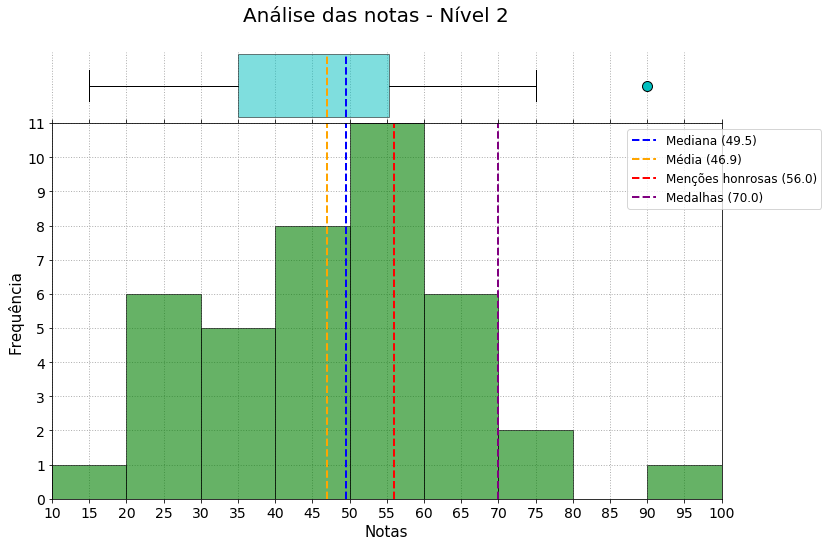

In [15]:
fig1, (ax2, ax1) = plt.subplots(figsize=(12, 8),
                                nrows=2,
                                sharex=True,
                                gridspec_kw={
                                    "height_ratios": (.15, .85),
                                    'hspace': 0.02
                                })

fig1.subplots_adjust(top=0.90)
fig1.suptitle('Análise das notas - Nível 2', fontsize=20)

plots.boxplot(df_prem_nivel2, 'Pontuação final', ax=ax2)
plots.histogram(df_prem_nivel2, 'Pontuação final', ax=ax1)

figname = 'images/hist_nivel2'
fig1.savefig(figname, bbox_inches='tight', dpi=300)

## Alunos por turma

In [16]:
turmas_nivel2 = inpdt.pivot_tables(df_prem_nivel2, 'ALUNO', 'TURMA', None)
turmas_nivel2

,ALUNO
TURMA,
AM241,8
AM251,4
BM141,1
BM151,3
FM141,4
FM151,3
MAM241,3
QM141,8
QM151,6


In [17]:
turmas_nivel2.T

TURMA,AM241,AM251,BM141,BM151,FM141,FM151,MAM241,QM141,QM151,Total
ALUNO,8,4,1,3,4,3,3,8,6,40


In [18]:
inpdt.latex(turmas_nivel2.T)

\begin{tabular}{lrrrrrrrrrr}
\toprule
TURMA &  AM241 &  AM251 &  BM141 &  BM151 &  FM141 &  FM151 &  MAM241 &  QM141 &  QM151 &  Total \\
\midrule
ALUNO &      8 &      4 &      1 &      3 &      4 &      3 &       3 &      8 &      6 &     40 \\
\bottomrule
\end{tabular}



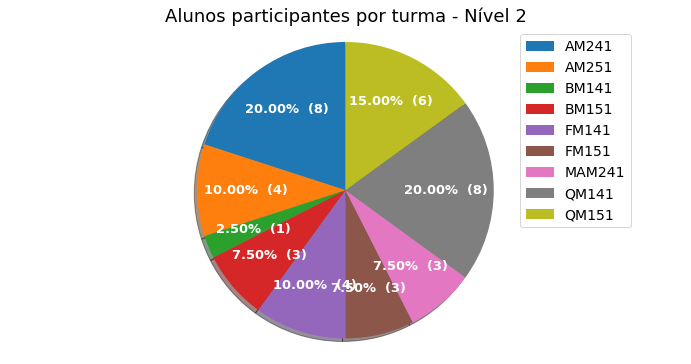

In [19]:
fig2, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(turmas_nivel2, 0)
labels = inpdt.pivot_index(turmas_nivel2)

plots.plot_pizza(values,
                 labels,
                 'Alunos participantes por turma - Nível 2',
                 ax=axarr)

figname = 'images/turmas_nivel2'
fig2.savefig(figname, bbox_inches='tight', dpi=300)

## Organizando a tabela de resumo estatístico

In [20]:
df_prem_nivel2.describe()

,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,8.725000,1.800000,1.500000,43.625000,3.300000,46.925000
std,2.855382,2.700427,3.616203,14.276909,5.543303,16.220259
min,3.000000,0.000000,0.000000,15.000000,0.000000,15.000000
25%,6.750000,0.000000,0.000000,33.750000,0.000000,35.000000
50%,9.000000,0.000000,0.000000,45.000000,0.000000,49.500000
75%,11.000000,4.250000,0.000000,55.000000,5.000000,55.250000
max,15.000000,10.000000,10.000000,75.000000,20.000000,90.000000


In [21]:
stats_nivel2 = inpdt.stats_table(df_prem_nivel2.describe())
stats_nivel2

,mean,std,min,25%,50%,75%,max,IQR
Pontos - Objetiva,43.62,14.28,15.0,33.75,45.0,55.00,75.0,21.25
Q17,1.80,2.70,0.0,0.00,0.0,4.25,10.0,4.25
Q18,1.50,3.62,0.0,0.00,0.0,0.00,10.0,0.00
Pontos - Discursiva,3.30,5.54,0.0,0.00,0.0,5.00,20.0,5.00
Pontuação final,46.92,16.22,15.0,35.00,49.5,55.25,90.0,20.25


In [22]:
inpdt.latex(stats_nivel2)

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   mean &    std &   min &    25\% &   50\% &    75\% &   max &    IQR \\
\midrule
Pontos - Objetiva   &  43.62 &  14.28 &  15.0 &  33.75 &  45.0 &  55.00 &  75.0 &  21.25 \\
Q17                 &   1.80 &   2.70 &   0.0 &   0.00 &   0.0 &   4.25 &  10.0 &   4.25 \\
Q18                 &   1.50 &   3.62 &   0.0 &   0.00 &   0.0 &   0.00 &  10.0 &   0.00 \\
Pontos - Discursiva &   3.30 &   5.54 &   0.0 &   0.00 &   0.0 &   5.00 &  20.0 &   5.00 \\
Pontuação final     &  46.92 &  16.22 &  15.0 &  35.00 &  49.5 &  55.25 &  90.0 &  20.25 \\
\bottomrule
\end{tabular}



## Análise de semestre e turno dos premiados

In [24]:
df_10_nivel2 = df_prem_nivel2.head(10)
df_10_nivel2

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
1,OKu4gSfE,QM151,15.0,5.0,10.0,75.0,15.0,90.0
2,AmZw0qUO,QM141,11.0,10.0,10.0,55.0,20.0,75.0
3,fFvtEAT4,AM241,13.0,5.0,0.0,65.0,5.0,70.0
4,smFiIup1,AM241,13.0,0.0,0.0,65.0,0.0,65.0
5,UdBkP5fc,FM141,13.0,0.0,0.0,65.0,0.0,65.0
6,XBOoSJsS,MAM241,11.0,8.0,0.0,55.0,8.0,63.0
7,okapRKkD,QM141,9.0,6.0,10.0,45.0,16.0,61.0
8,XMZciuPO,MAM241,11.0,5.0,0.0,55.0,5.0,60.0
9,FWwLq15p,QM151,12.0,0.0,0.0,60.0,0.0,60.0
10,6yV1cBPt,BM151,11.0,1.0,0.0,55.0,1.0,56.0


In [26]:
df_10_nivel2 = inpdt.semester_shift(df_10_nivel2)
df_10_nivel2

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final,cod,num,Período,Turno
1,OKu4gSfE,QM151,15.0,5.0,10.0,75.0,15.0,90.0,QM,151,5º período,Manhã
2,AmZw0qUO,QM141,11.0,10.0,10.0,55.0,20.0,75.0,QM,141,4º período,Manhã
3,fFvtEAT4,AM241,13.0,5.0,0.0,65.0,5.0,70.0,AM,241,4º período,Tarde
4,smFiIup1,AM241,13.0,0.0,0.0,65.0,0.0,65.0,AM,241,4º período,Tarde
5,UdBkP5fc,FM141,13.0,0.0,0.0,65.0,0.0,65.0,FM,141,4º período,Manhã
6,XBOoSJsS,MAM241,11.0,8.0,0.0,55.0,8.0,63.0,MAM,241,4º período,Tarde
7,okapRKkD,QM141,9.0,6.0,10.0,45.0,16.0,61.0,QM,141,4º período,Manhã
8,XMZciuPO,MAM241,11.0,5.0,0.0,55.0,5.0,60.0,MAM,241,4º período,Tarde
9,FWwLq15p,QM151,12.0,0.0,0.0,60.0,0.0,60.0,QM,151,5º período,Manhã
10,6yV1cBPt,BM151,11.0,1.0,0.0,55.0,1.0,56.0,BM,151,5º período,Manhã


In [27]:
per_10_nivel2 = inpdt.pivot_tables(df_10_nivel2, 'ALUNO', 'Período', None)
per_10_nivel2

,ALUNO
Período,
4º período,7
5º período,3
Total,10


In [28]:
inpdt.latex(per_10_nivel2)

\begin{tabular}{lr}
\toprule
{} &  ALUNO \\
Período    &        \\
\midrule
4º período &      7 \\
5º período &      3 \\
Total      &     10 \\
\bottomrule
\end{tabular}



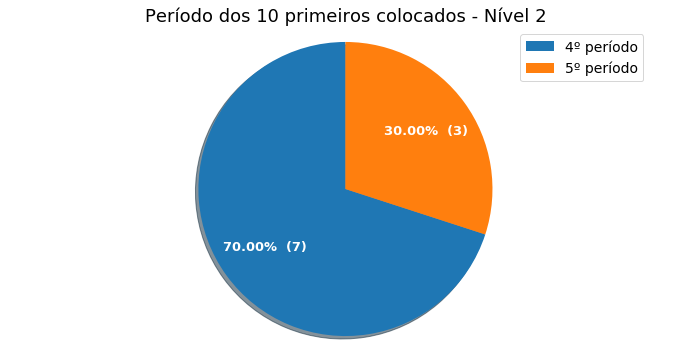

In [29]:
fig3, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(per_10_nivel2, 0)
labels = inpdt.pivot_index(per_10_nivel2)

plots.plot_pizza(values,
                 labels,
                 'Período dos 10 primeiros colocados - Nível 2',
                 ax=axarr)

figname = 'images/per_10_nivel2'
fig3.savefig(figname, bbox_inches='tight', dpi=300)

In [30]:
curso_10_nivel2 = inpdt.pivot_tables(df_10_nivel2, 'ALUNO', 'cod', None)
curso_10_nivel2

,ALUNO
cod,
AM,2
BM,1
FM,1
MAM,2
QM,4
Total,10


In [31]:
inpdt.latex(curso_10_nivel2)

\begin{tabular}{lr}
\toprule
{} &  ALUNO \\
cod   &        \\
\midrule
AM    &      2 \\
BM    &      1 \\
FM    &      1 \\
MAM   &      2 \\
QM    &      4 \\
Total &     10 \\
\bottomrule
\end{tabular}



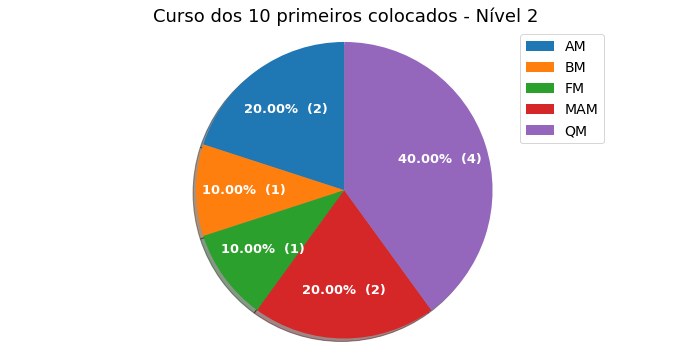

In [33]:
fig4, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(curso_10_nivel2, 0)
labels = inpdt.pivot_index(curso_10_nivel2)

plots.plot_pizza(values,
                 labels,
                 'Curso dos 10 primeiros colocados - Nível 2',
                 ax=axarr)

figname = 'images/curso_10_nivel2'
fig4.savefig(figname, bbox_inches='tight', dpi=300)